In [156]:
import pygrib
import glob
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cf


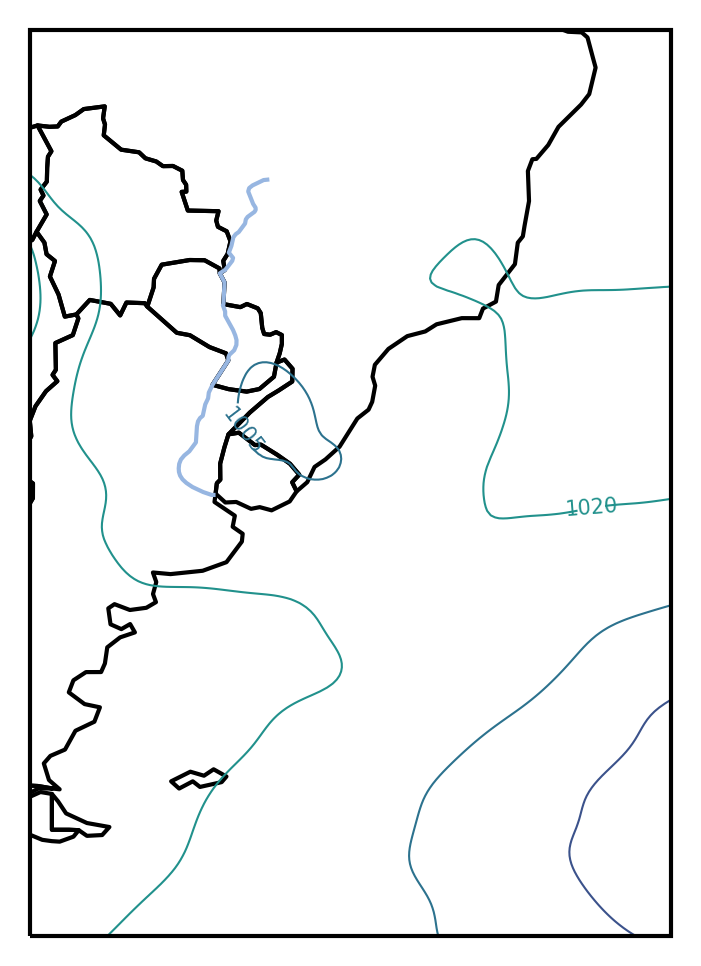

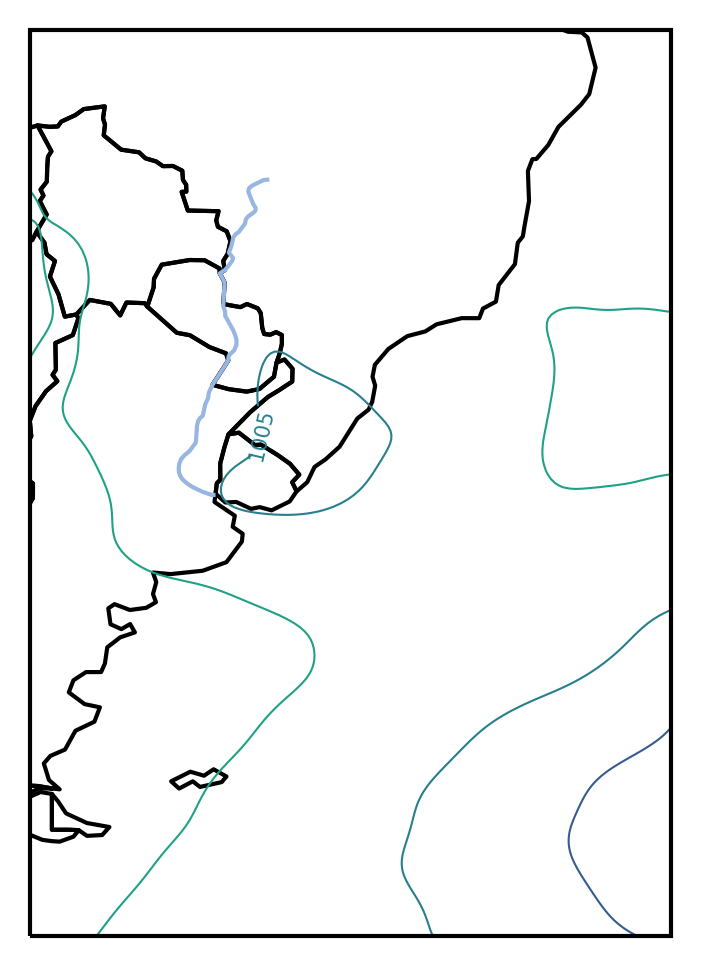

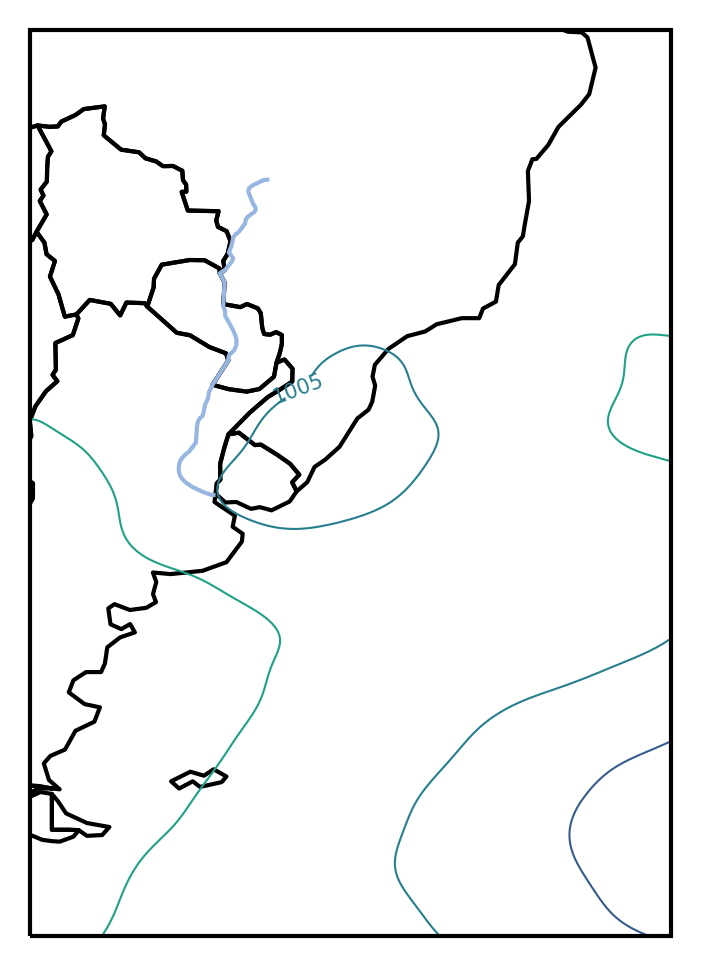

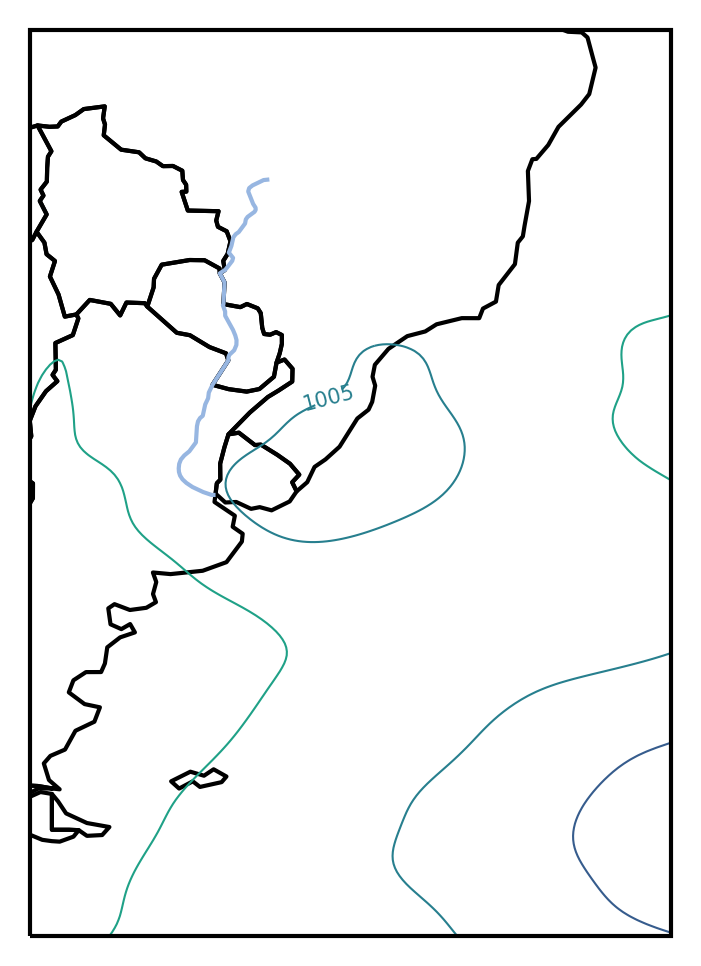

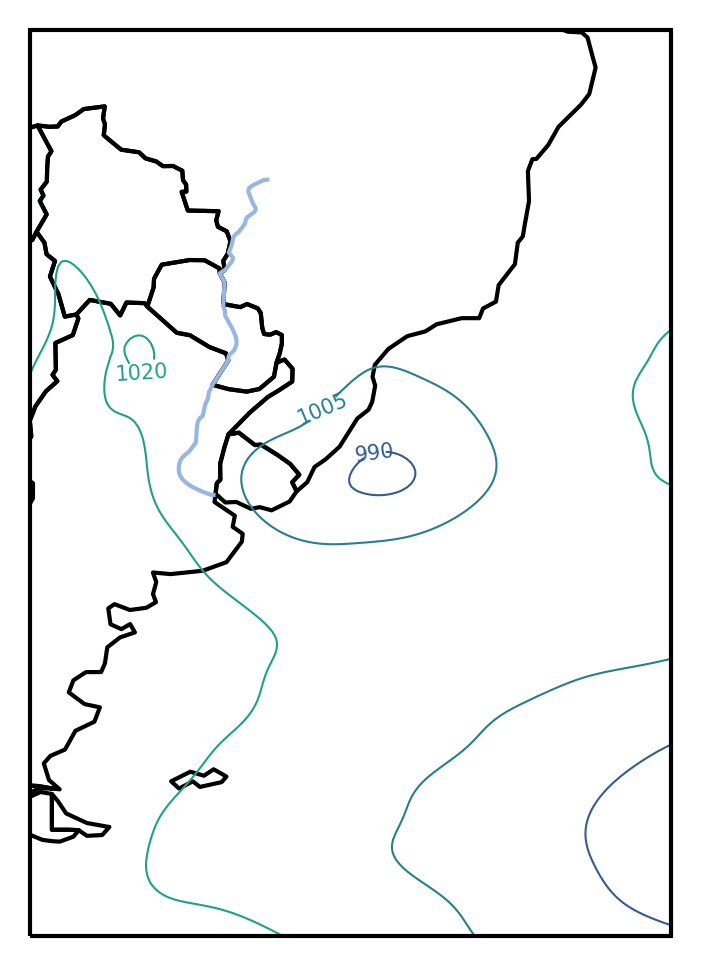

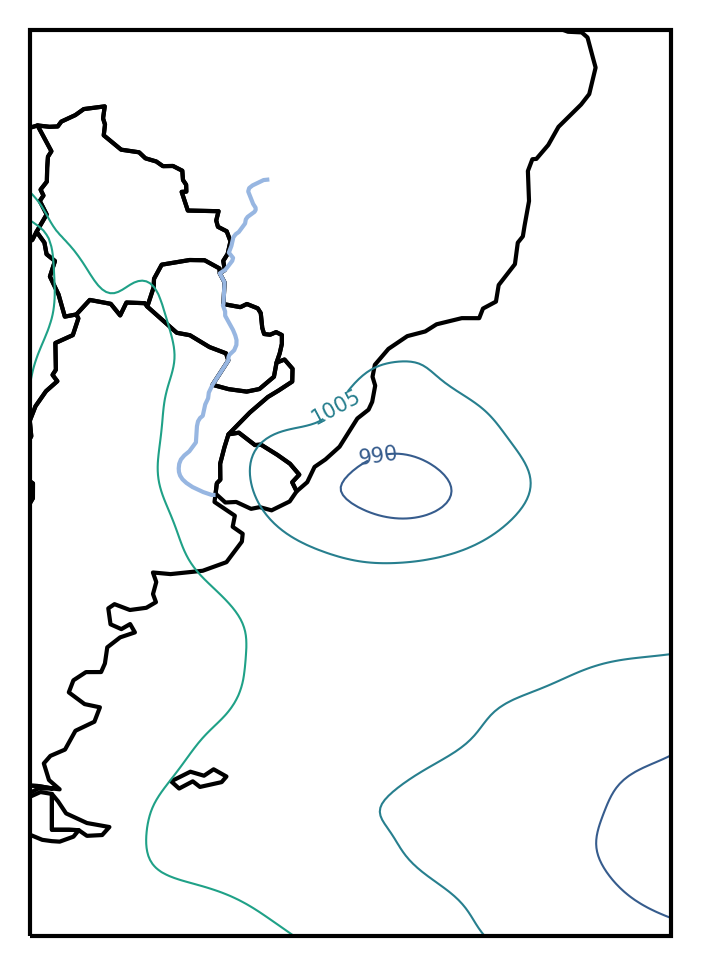

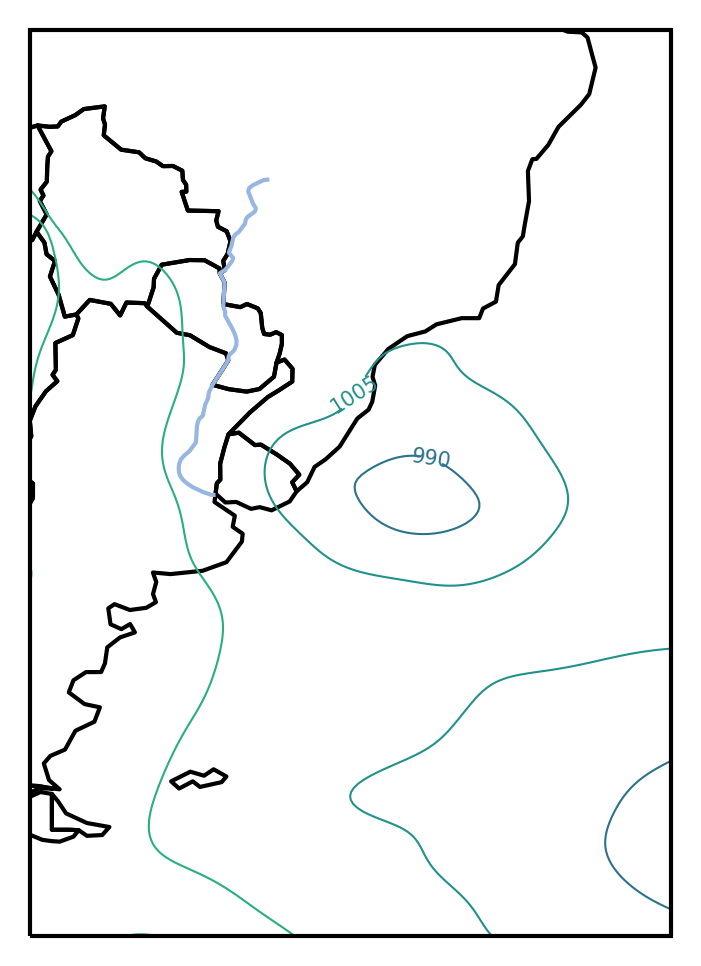

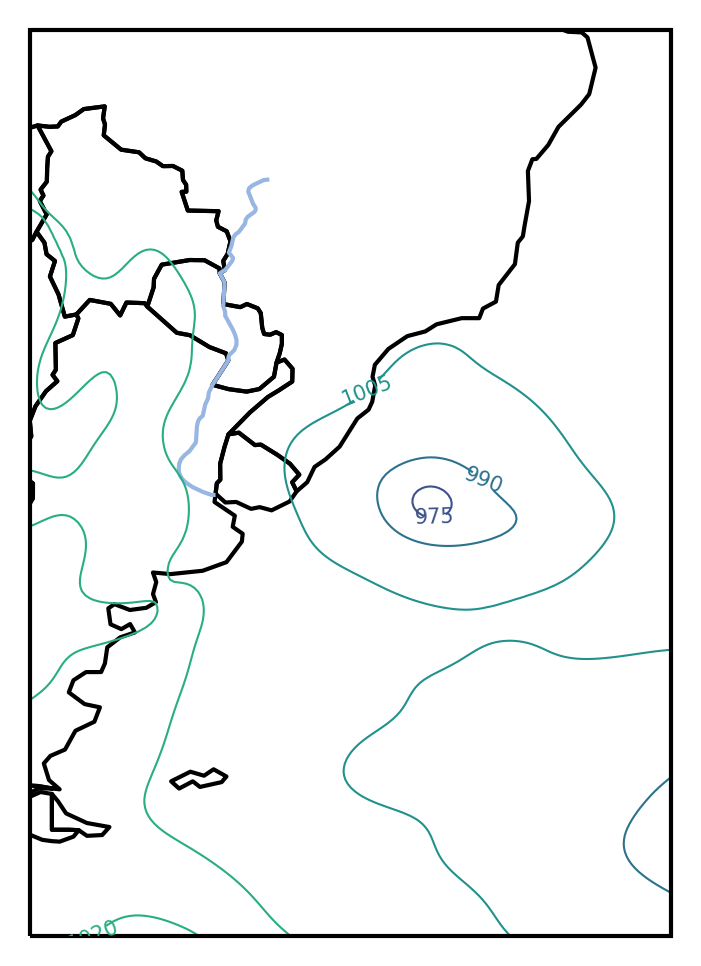

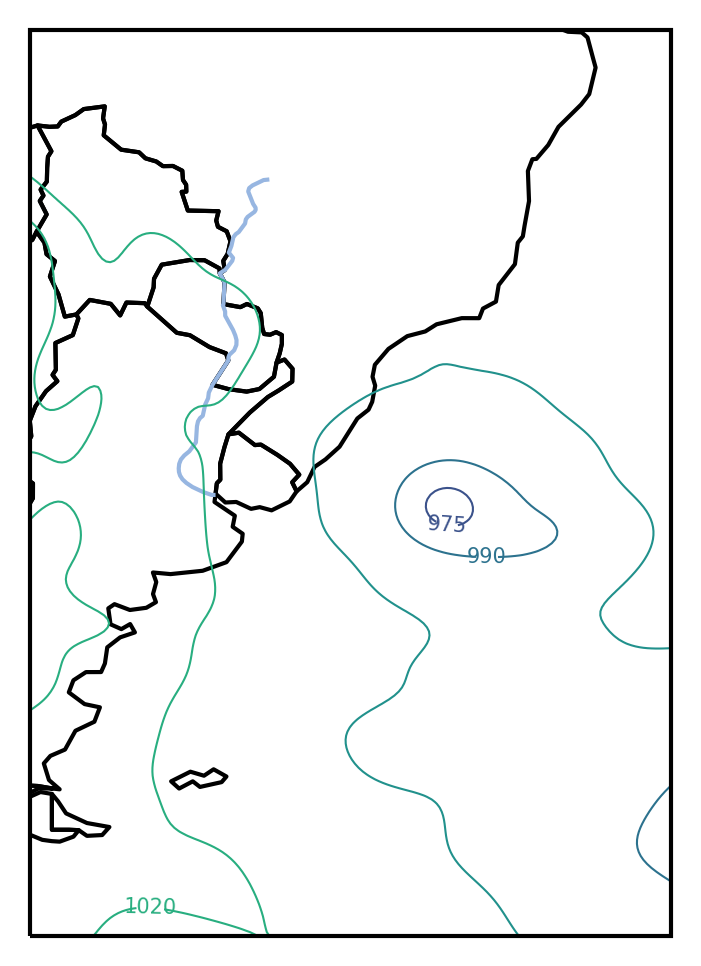

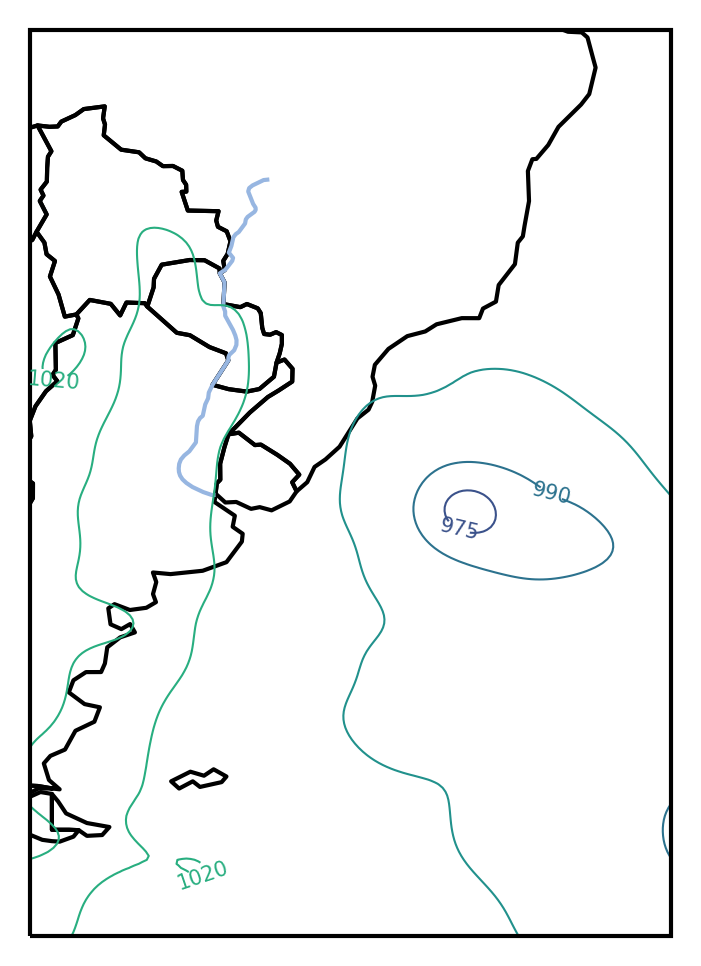

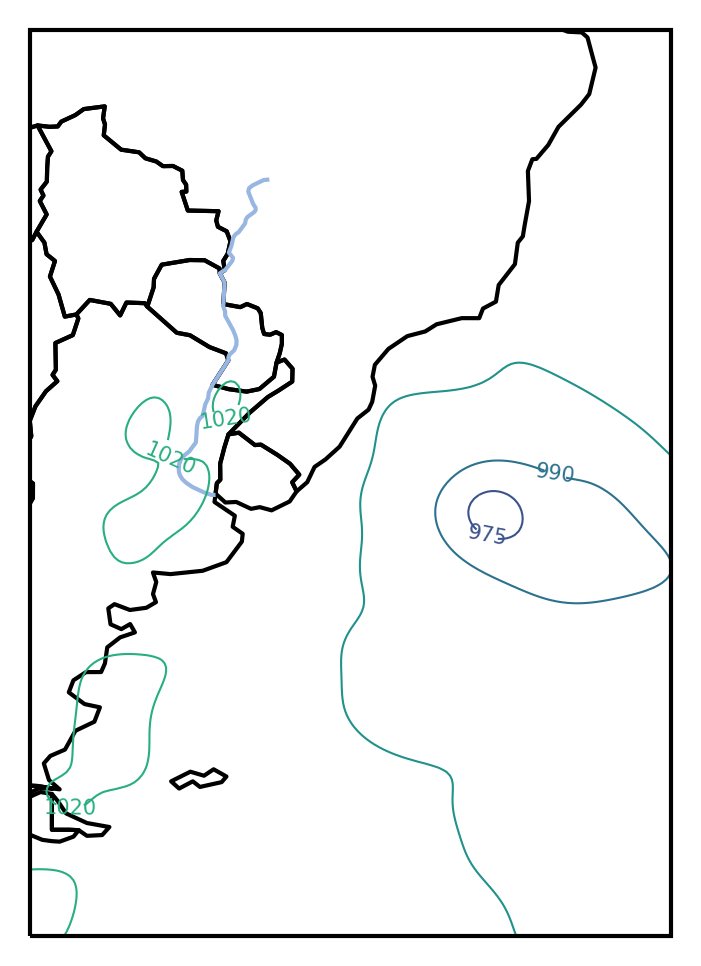

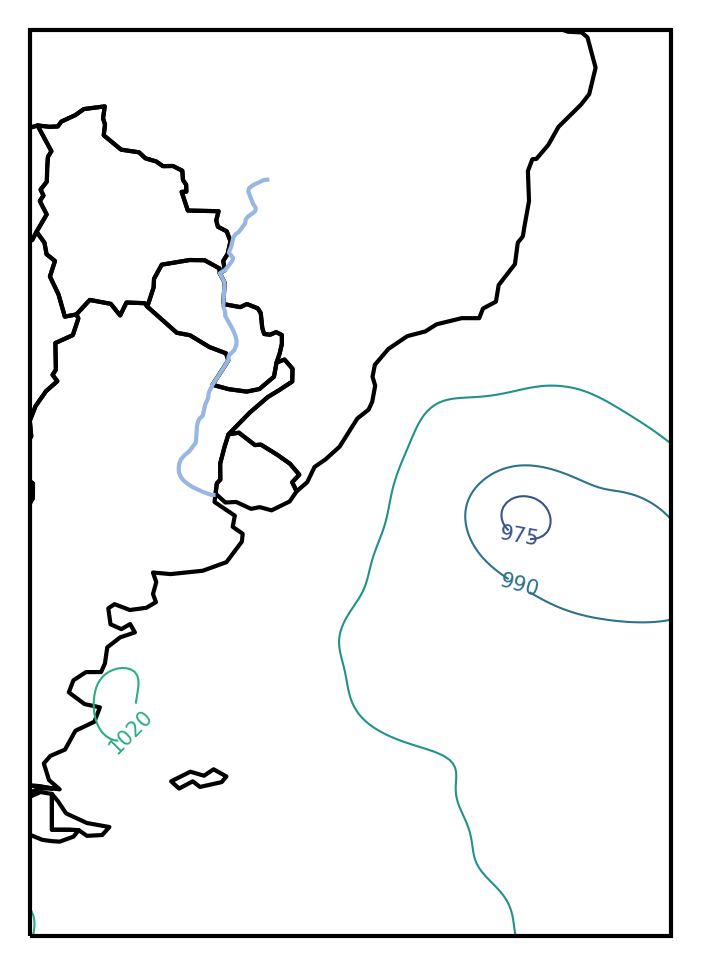

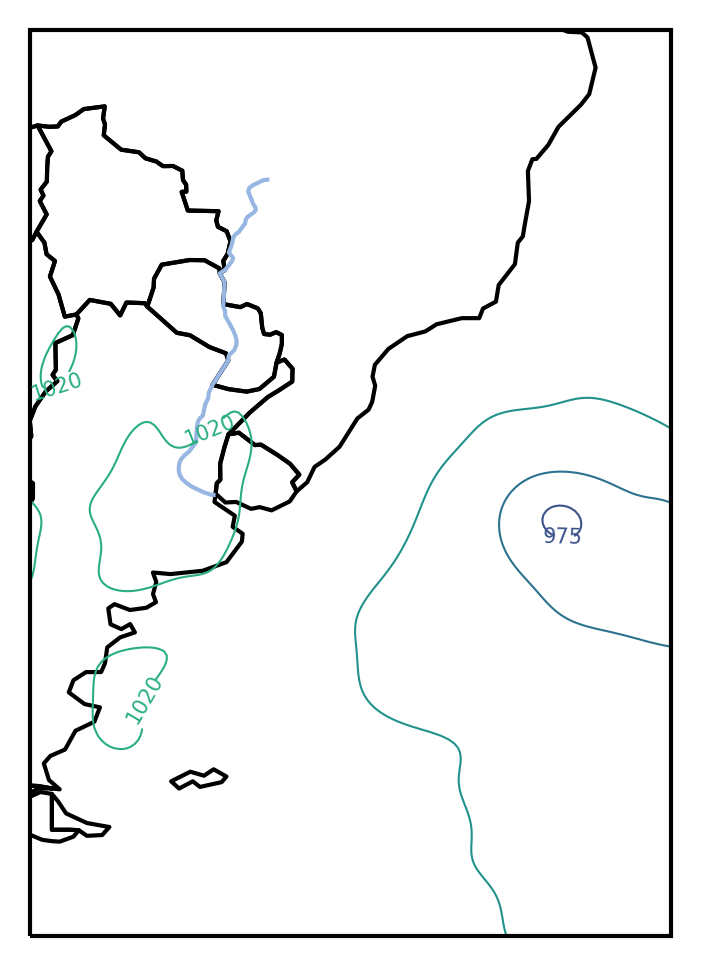

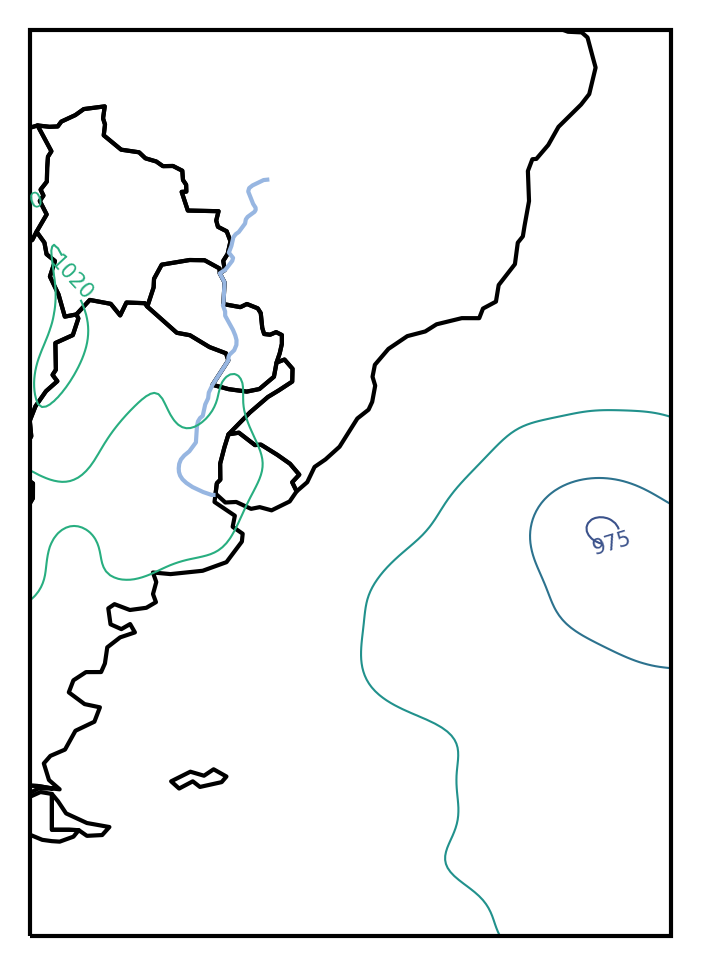

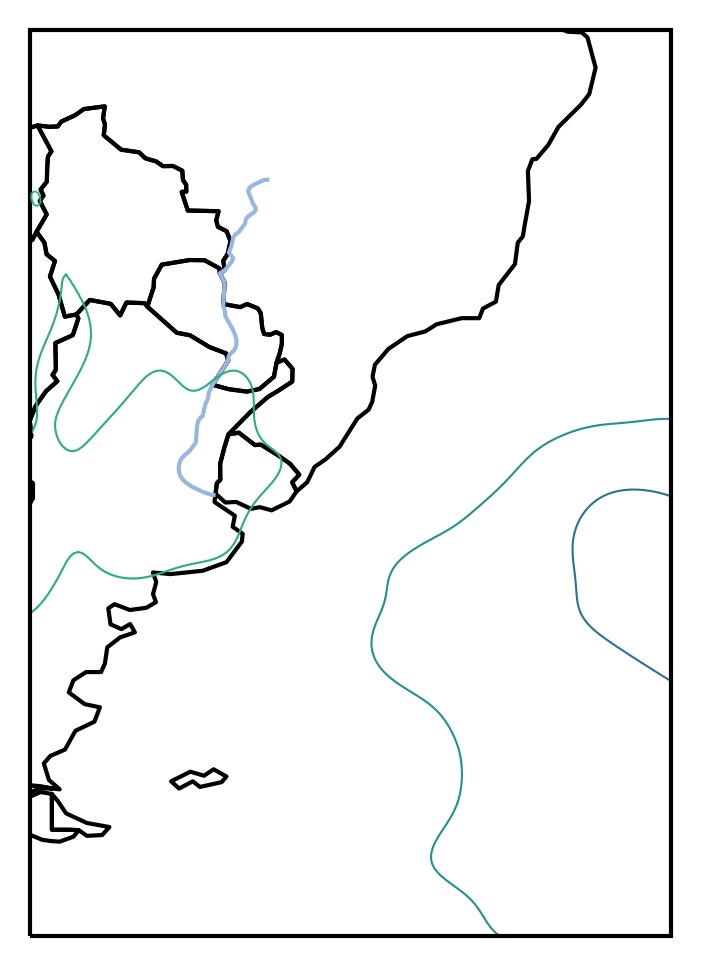

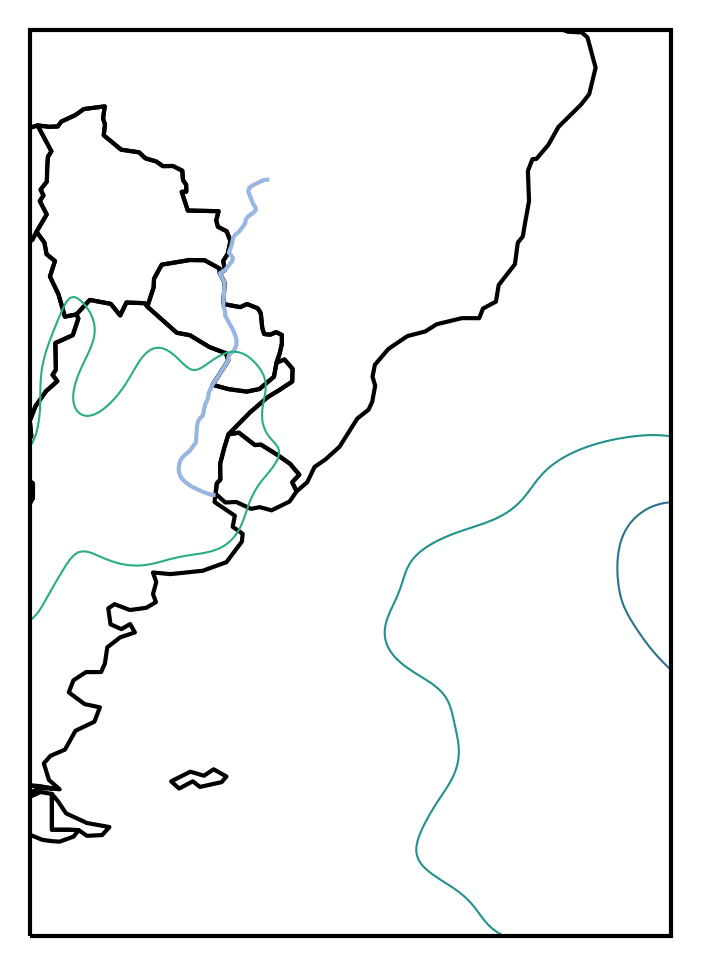

In [189]:
files = sorted(glob.glob('/home/lucas/GFS/2020063012/*'))
for file in files:
    indx = pygrib.index(file, 'typeOfLevel', 'level', 'name') 
    gpt_1000 = indx.select(level=850, typeOfLevel="isobaricInhPa", name="Geopotential Height")
    temp_10 = indx.select(level=1000, typeOfLevel="isobaricInhPa", name="Temperature")
    sfc = indx.select(level=0, typeOfLevel="meanSea", name="Pressure reduced to MSL")
    lat,lon = gpt_1000[0].latlons()
    gpt = gpt_1000[0].values
    temp = temp_10[0].values
    sfc = sfc[0].values/10**2
    

    resolution = '110m'
    fig = plt.figure(dpi=300)
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cf.NaturalEarthFeature('cultural',
                'admin_0_countries', resolution, edgecolor = 'black', facecolor = 'none'))
    ax.add_feature(cf.NaturalEarthFeature('physical',
                'lakes', resolution, edgecolor = 'none', facecolor = cf.COLORS['water']),
                alpha = 0.01)
    ax.add_feature(cf.NaturalEarthFeature('physical',
                'rivers_lake_centerlines', resolution, edgecolor = cf.COLORS['water'], facecolor = 'none'))
    ax.add_feature(cf.NaturalEarthFeature('cultural',
                'admin_1_states_provinces_lines', resolution, edgecolor = 'gray', facecolor = 'none'))
    ax.set_extent([-70,-30,-60,-5])
    line=ax.contour(lon,lat,sfc,linewidths=0.5)
    plt.clabel(line,fmt='%.0f',fontsize=5)
    plt.show()
    plt.close()

In [179]:
import pygrib
indx = pygrib.index('/home/lucas/GFS/2020063012/gfs.0p25.2020063012.f030.grib2', 'typeOfLevel', 'level', 'name') 
gpt_1000 = indx.select(level=850, typeOfLevel="isobaricInhPa", name="Geopotential Height")
temp_10 = indx.select(level=1000, typeOfLevel="isobaricInhPa", name="Temperature")
sfc = indx.select(level=0, typeOfLevel="meanSea", name="Pressure reduced to MSL")
# msg = indx.select(level=1000, typeOfLevel="isobaricInhPa", name="Geopotential Height")
# msg = indx.select(level=1000, typeOfLevel="isobaricInhPa", name="Geopotential Height")

lat,lon = gpt_1000[0].latlons()

temp_10 = gpt_1000[0].values

sfc = sfc[0].values/10**2

In [180]:
sfc

array([[1014.3    , 1014.3    , 1014.3    , ..., 1014.3    , 1014.3    ,
        1014.3    ],
       [1013.886  , 1013.884  , 1013.884  , ..., 1013.88806, 1013.886  ,
        1013.886  ],
       [1013.48   , 1013.478  , 1013.478  , ..., 1013.484  , 1013.48206,
        1013.48206],
       ...,
       [1039.952  , 1039.956  , 1039.96   , ..., 1039.936  , 1039.94   ,
        1039.946  ],
       [1038.1781 , 1038.18   , 1038.182  , ..., 1038.17   , 1038.172  ,
        1038.176  ],
       [1036.162  , 1036.162  , 1036.162  , ..., 1036.162  , 1036.162  ,
        1036.162  ]], dtype=float32)

<a list of 61 text.Text objects>

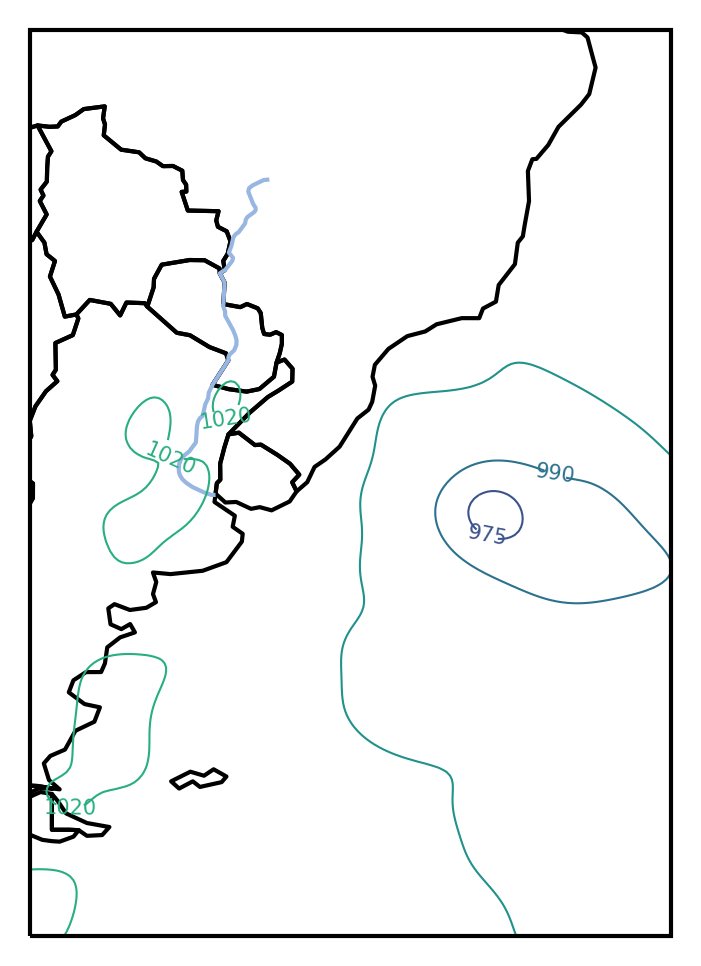

In [185]:

resolution = '110m'
fig = plt.figure(dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cf.NaturalEarthFeature('cultural',
            'admin_0_countries', resolution, edgecolor = 'black', facecolor = 'none'))
ax.add_feature(cf.NaturalEarthFeature('physical',
            'lakes', resolution, edgecolor = 'none', facecolor = cf.COLORS['water']),
            alpha = 0.01)
ax.add_feature(cf.NaturalEarthFeature('physical',
            'rivers_lake_centerlines', resolution, edgecolor = cf.COLORS['water'], facecolor = 'none'))
ax.add_feature(cf.NaturalEarthFeature('cultural',
            'admin_1_states_provinces_lines', resolution, edgecolor = 'gray', facecolor = 'none'))
ax.set_extent([-70,-30,-60,-5])
line=ax.contour(lon,lat,sfc,linewidths=0.5)
plt.clabel(line,fmt='%.0f',fontsize=5)
#temp_10

In [ ]:
pres = ds['isobaric3'].values[:] * units('Pa')

tmpk_var = ds['Temperature_isobaric'].metpy.sel(lat=lat_slice, lon=lon_slice).squeeze()
tmpk = mpcalc.smooth_n_point(tmpk_var, 9, 2)
thta = mpcalc.potential_temperature(pres[:, None, None], tmpk)

uwnd_var = ds['u-component_of_wind_isobaric'].metpy.sel(lat=lat_slice, lon=lon_slice).squeeze()
vwnd_var = ds['v-component_of_wind_isobaric'].metpy.sel(lat=lat_slice, lon=lon_slice).squeeze()

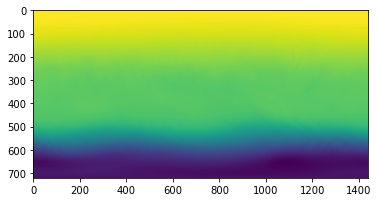

In [123]:
plt.imshow(geopt)

In [32]:
files = sorted(glob.glob('/home/lucas/GFS/2020063012/*'))

In [54]:
for grb in grbs:
    print(grb)

1:Cloud mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 24 hrs:from 202006301200
2:Ice water mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 24 hrs:from 202006301200
3:Rain mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 24 hrs:from 202006301200
4:Snow mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 24 hrs:from 202006301200
5:Graupel (snow pellets):kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 24 hrs:from 202006301200
6:Maximum/Composite radar reflectivity:dB (instant):regular_ll:atmosphere:level 0 -:fcst time 24 hrs:from 202006301200
7:Visibility:m (instant):regular_ll:surface:level 0:fcst time 24 hrs:from 202006301200
8:U component of wind:m s**-1 (instant):regular_ll:unknown:level 0:fcst time 24 hrs:from 202006301200
9:V component of wind:m s**-1 (instant):regular_ll:unknown:level 0:fcst time 24 hrs:from 202006301200
10:Ventilation Rate:m**2 s**-1 (instant):regular_ll:unknown:level 0:fcst t

178:Total Cloud Cover:% (instant):regular_ll:isobaricInhPa:level 35000 Pa:fcst time 24 hrs:from 202006301200
179:Vertical velocity:Pa s**-1 (instant):regular_ll:isobaricInhPa:level 35000 Pa:fcst time 24 hrs:from 202006301200
180:Geometric vertical velocity:m s**-1 (instant):regular_ll:isobaricInhPa:level 35000 Pa:fcst time 24 hrs:from 202006301200
181:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 35000 Pa:fcst time 24 hrs:from 202006301200
182:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 35000 Pa:fcst time 24 hrs:from 202006301200
183:Absolute vorticity:s**-1 (instant):regular_ll:isobaricInhPa:level 35000 Pa:fcst time 24 hrs:from 202006301200
184:Cloud mixing ratio:kg kg**-1 (instant):regular_ll:isobaricInhPa:level 35000 Pa:fcst time 24 hrs:from 202006301200
185:Ice water mixing ratio:kg kg**-1 (instant):regular_ll:isobaricInhPa:level 35000 Pa:fcst time 24 hrs:from 202006301200
186:Rain mixing ratio:kg kg**-1 (instant):regular_ll:isobaricI

373:Graupel (snow pellets):kg kg**-1 (instant):regular_ll:isobaricInhPa:level 92500 Pa:fcst time 24 hrs:from 202006301200
374:Geopotential Height:gpm (instant):regular_ll:isobaricInhPa:level 95000 Pa:fcst time 24 hrs:from 202006301200
375:Temperature:K (instant):regular_ll:isobaricInhPa:level 95000 Pa:fcst time 24 hrs:from 202006301200
376:Relative humidity:% (instant):regular_ll:isobaricInhPa:level 95000 Pa:fcst time 24 hrs:from 202006301200
377:Total Cloud Cover:% (instant):regular_ll:isobaricInhPa:level 95000 Pa:fcst time 24 hrs:from 202006301200
378:Vertical velocity:Pa s**-1 (instant):regular_ll:isobaricInhPa:level 95000 Pa:fcst time 24 hrs:from 202006301200
379:Geometric vertical velocity:m s**-1 (instant):regular_ll:isobaricInhPa:level 95000 Pa:fcst time 24 hrs:from 202006301200
380:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 95000 Pa:fcst time 24 hrs:from 202006301200
381:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 95000 Pa:fcst

522:U component of wind:m s**-1 (instant):regular_ll:heightAboveGround:level 30 m:fcst time 24 hrs:from 202006301200
523:V component of wind:m s**-1 (instant):regular_ll:heightAboveGround:level 30 m:fcst time 24 hrs:from 202006301200
524:U component of wind:m s**-1 (instant):regular_ll:heightAboveGround:level 40 m:fcst time 24 hrs:from 202006301200
525:V component of wind:m s**-1 (instant):regular_ll:heightAboveGround:level 40 m:fcst time 24 hrs:from 202006301200
526:U component of wind:m s**-1 (instant):regular_ll:heightAboveGround:level 50 m:fcst time 24 hrs:from 202006301200
527:V component of wind:m s**-1 (instant):regular_ll:heightAboveGround:level 50 m:fcst time 24 hrs:from 202006301200
528:Temperature:K (instant):regular_ll:heightAboveGround:level 80 m:fcst time 24 hrs:from 202006301200
529:Specific humidity:kg kg**-1 (instant):regular_ll:heightAboveGround:level 80 m:fcst time 24 hrs:from 202006301200
530:Pressure:Pa (instant):regular_ll:heightAboveGround:level 80 m:fcst time 24

In [57]:
grb = grbs.select(name='Geopotential Height')

In [80]:
gpt_850 = grb[28].values

In [90]:
gpt_850.shape, lats.shape, lons.shape

((721, 1440), (721, 1440), (721, 1440))

In [110]:
lats, lons = grb[28].latlons?

Object `latlons` not found.


In [ ]:
lats, lons = grb[28].latlons

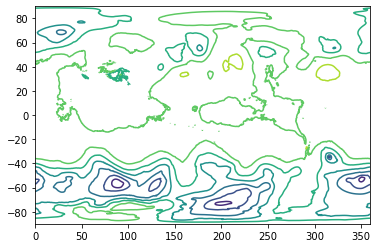

In [138]:
plt.contour(lons,lats,gpt_850)

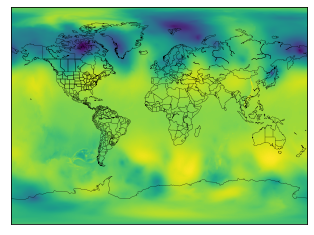

In [109]:
# Create a figure
bm = Basemap(projection='mill')
# Add geographic outlines
bm.drawcoastlines(linewidth=0.25)
bm.drawstates(linewidth=0.25)
bm.drawcountries(linewidth=0.25)
bm.imshow(gpt_850) #(left, right, bottom, top)

3:Rain mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 24 hrs:from 202006301200

In [49]:
data, lats, lons =grb[0].data(lat1=20,lat2=70,lon1=220,lon2=320)

array([[220.  , 220.25, 220.5 , ..., 319.5 , 319.75, 320.  ],
       [220.  , 220.25, 220.5 , ..., 319.5 , 319.75, 320.  ],
       [220.  , 220.25, 220.5 , ..., 319.5 , 319.75, 320.  ],
       ...,
       [220.  , 220.25, 220.5 , ..., 319.5 , 319.75, 320.  ],
       [220.  , 220.25, 220.5 , ..., 319.5 , 319.75, 320.  ],
       [220.  , 220.25, 220.5 , ..., 319.5 , 319.75, 320.  ]])

In [43]:
f = pygrib.open(files[0])
lats, lons = f.latlons()

AttributeError: 'pygrib.open' object has no attribute 'latlons'

In [2]:
grbs = pygrib.open('/home/lucas/GFS/2020063012/gfs.0p25.2020063012.f000.grib2')

In [54]:
grbs.seek(500)

In [56]:
grbs.tell()
grbs.read(1)[0]

501:V component of wind:m s**-1 (instant):regular_ll:sigma:level 0.995 sigma value:fcst time 0 hrs:from 202006301200

In [3]:
grbs.seek(0)
for grb in grbs:
    print(grb)

1:Cloud mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202006301200
2:Ice water mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202006301200
3:Rain mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202006301200
4:Snow mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202006301200
5:Graupel (snow pellets):kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202006301200
6:Maximum/Composite radar reflectivity:dB (instant):regular_ll:atmosphere:level 0 -:fcst time 0 hrs:from 202006301200
7:Visibility:m (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 202006301200
8:U component of wind:m s**-1 (instant):regular_ll:unknown:level 0:fcst time 0 hrs:from 202006301200
9:V component of wind:m s**-1 (instant):regular_ll:unknown:level 0:fcst time 0 hrs:from 202006301200
10:Ventilation Rate:m**2 s**-1 (instant):regular_ll:unknown:level 0:fcst time 0 hrs

364:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 95000 Pa:fcst time 0 hrs:from 202006301200
365:Absolute vorticity:s**-1 (instant):regular_ll:isobaricInhPa:level 95000 Pa:fcst time 0 hrs:from 202006301200
366:Cloud mixing ratio:kg kg**-1 (instant):regular_ll:isobaricInhPa:level 95000 Pa:fcst time 0 hrs:from 202006301200
367:Ice water mixing ratio:kg kg**-1 (instant):regular_ll:isobaricInhPa:level 95000 Pa:fcst time 0 hrs:from 202006301200
368:Rain mixing ratio:kg kg**-1 (instant):regular_ll:isobaricInhPa:level 95000 Pa:fcst time 0 hrs:from 202006301200
369:Snow mixing ratio:kg kg**-1 (instant):regular_ll:isobaricInhPa:level 95000 Pa:fcst time 0 hrs:from 202006301200
370:Graupel (snow pellets):kg kg**-1 (instant):regular_ll:isobaricInhPa:level 95000 Pa:fcst time 0 hrs:from 202006301200
371:Haines Index:Numeric (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 202006301200
372:Geopotential Height:gpm (instant):regular_ll:isobaricInhPa:level 97500 Pa:fcst t

In [26]:
grb = grbs.select(name='Rain mixing ratio')

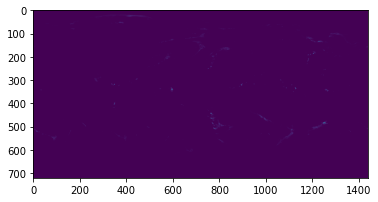

In [27]:
import matplotlib.pyplot as plt


plt.imshow(grb[-1].values)

In [28]:
grb[-1]

396:Rain mixing ratio:kg kg**-1 (instant):regular_ll:isobaricInhPa:level 100000 Pa:fcst time 0 hrs:from 202006301200

In [115]:
temp2m

array([[273.71103, 273.71103, 273.71103, ..., 273.71103, 273.71103,
        273.71103],
       [273.71103, 273.71103, 273.71103, ..., 273.71103, 273.71103,
        273.71103],
       [273.61105, 273.61105, 273.61105, ..., 273.61105, 273.61105,
        273.61105],
       ...,
       [230.41104, 230.41104, 230.41104, ..., 230.41104, 230.41104,
        230.41104],
       [233.61104, 233.61104, 233.61104, ..., 233.61104, 233.61104,
        233.61104],
       [234.31104, 234.31104, 234.31104, ..., 234.31104, 234.31104,
        234.31104]], dtype=float32)